<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning/blob/main/Project%3A%20Predicting%20Diabetes%20Diagnosis%20Using%20K-Nearest%20Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Diabetes Diagnosis Using K-Nearest Neighbors: A Data Science Project**
**Task**

The following dataset is from the National Institute of Diabetes and Kidney Diseases, India. The goal is to predict whether a patient has diabetes based on diagnostic measurements.

**Content**

All patients in the dataset are women at least 21 years old.

**Columns:**

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome

**Dataset**: https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv

In [122]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


In [123]:
url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
corr_matrix = df.corr().abs()

corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [84]:
correlations = df.corrwith(df['Outcome'])

# Apply absolute value to the correlations and sort
correlations.abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

**Why .abs() is used?**

 Correlation Significance: Correlation coefficients range from -1 to 1. A value of -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation. However, whether the correlation is positive or negative, the strength of the correlation is determined by the magnitude (absolute value) of the coefficient. For example, a correlation of -0.8 is just as strong as a correlation of 0.8.

In [17]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [20]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [124]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=12)

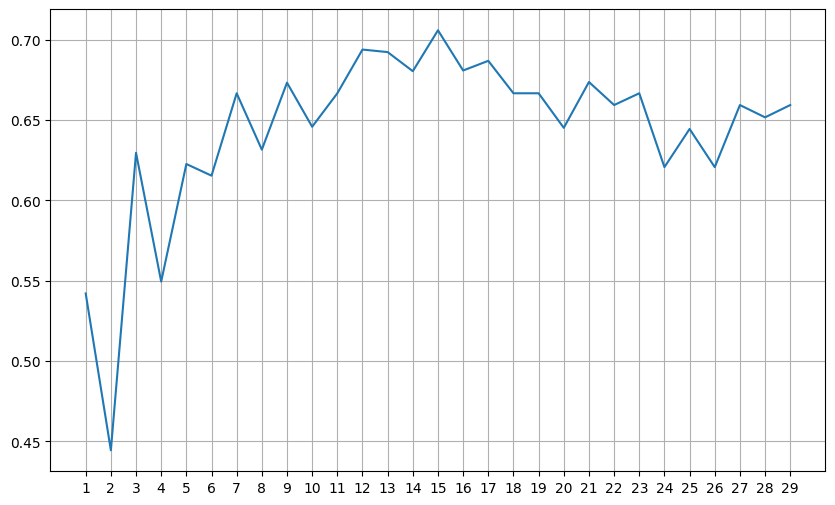

In [125]:
# Finding the best k
f1 = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),f1)
plt.xticks(range(1,30))
plt.grid()
plt.show()

In [126]:
# Using Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 30)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [127]:
knn_gscv.cv_results_['rank_test_score']

array([29, 28, 20, 23, 27, 26, 22, 21, 25, 24, 19, 14,  7, 16,  5, 17,  1,
       10,  2, 13,  8, 15, 11, 18, 12,  4,  6,  9,  3], dtype=int32)

In [129]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [130]:
best_k = knn_gscv.best_params_['n_neighbors']
knn_gscv.best_score_

0.7669892199303965

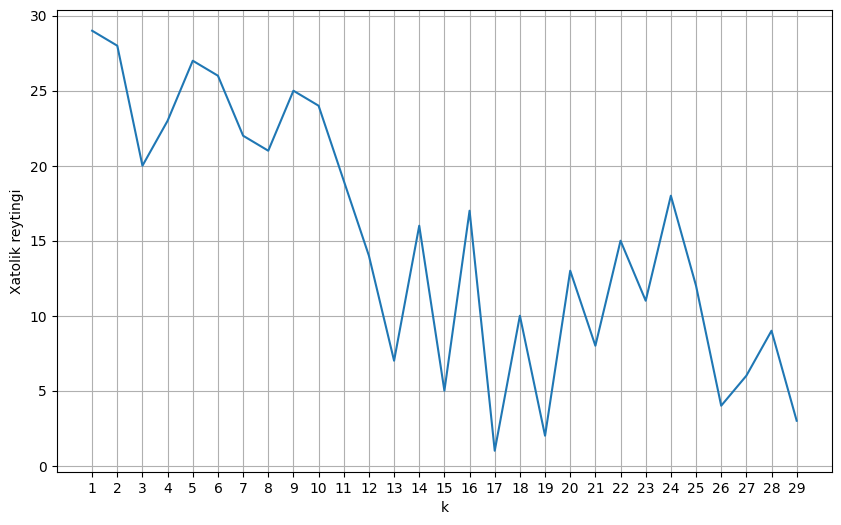

In [131]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

In [132]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [133]:
prediction=knn.predict(x_test)

In [134]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [135]:
jaccard_score(y_test,prediction)

0.5230769230769231

In [136]:
confusion_matrix(y_test, prediction)

array([[89, 10],
       [21, 34]])

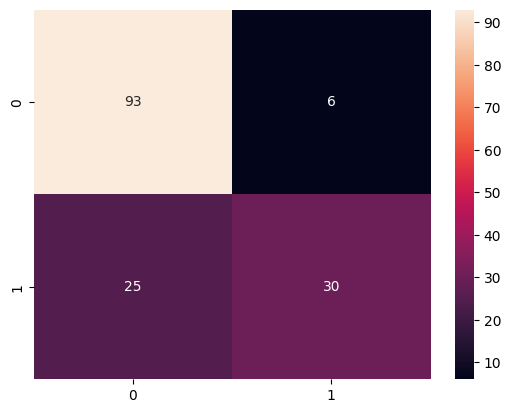

In [137]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

## **Cross_Validation**

In [138]:
predicted=cross_val_predict(knn, x,y, cv=5)

In [139]:
print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768



# **Testing with new patient data**

In [140]:
new_patients = {
    'Pregnancies': [1, 5],
    'Glucose': [120, 150],
    'BloodPressure': [70, 80],
    'SkinThickness': [20, 25],
    'Insulin': [80, 120],
    'BMI': [30.0, 35.0],
    'DiabetesPedigreeFunction': [0.5, 0.7],
    'Age': [25, 45]
}
new_data = pd.DataFrame(new_patients)

In [141]:
newx=scaler.fit_transform(new_data)
outcome=knn.predict(newx)

In [142]:
outcome

array([0, 1])